<a href="https://colab.research.google.com/github/fortune-max/M4-python-refresher-ml/blob/main/Day12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model example

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.sequential = nn.Sequential(nn.Conv2d(1, 32, 5),
                                        nn.Conv2d(32, 64, 5),
                                        nn.Dropout(0.3))
        self.layer1 = nn.Conv2d(64, 128, 5)
        self.layer2 = nn.Conv2d(128, 256, 5)
        self.fc = nn.Linear(256*34*34, 128)

    def forward(self, x):

        output = self.sequential(x)
        output = self.layer1(output)
        output = self.layer2(output)
        output = output.view(output.size()[0], -1)
        output = self.fc(output)

        return output

In [ ]:
model = NeuralNet()

print(model)

NeuralNet(
  (sequential): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (2): Dropout(p=0.3, inplace=False)
  )
  (layer1): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (layer2): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=295936, out_features=128, bias=True)
)


In [ ]:
for name, param in model.named_parameters():
    print('name: ', name)
    print(type(param))
    print('param.shape: ', param.shape)
    print('param.requires_grad: ', param.requires_grad)
    print('=====')

name:  sequential.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([32, 1, 5, 5])
param.requires_grad:  True
=====
name:  sequential.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([32])
param.requires_grad:  True
=====
name:  sequential.1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 32, 5, 5])
param.requires_grad:  True
=====
name:  sequential.1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  True
=====
name:  layer1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([128, 64, 5, 5])
param.requires_grad:  True
=====
name:  layer1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([128])
param.requires_grad:  True
=====
name:  layer2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([256, 128, 5, 5])
param.requires_grad:  True
=====
name:  layer2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape: 

In [ ]:
torch.save(model.state_dict(), 'my_pytorch_model.pth')

In [ ]:
!ls my_pytorch_model.pth -lah

-rw-r--r-- 1 maxmmsu maxmmsu 149M Oct 30 15:46 my_pytorch_model.pth


In [ ]:
the_comletely_new_model = NeuralNet()

In [ ]:
the_comletely_new_model.load_state_dict(torch.load('my_pytorch_model.pth'))

<All keys matched successfully>

In [ ]:
the_comletely_new_model.parameters

<bound method Module.parameters of NeuralNet(
  (sequential): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (2): Dropout(p=0.3, inplace=False)
  )
  (layer1): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (layer2): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=295936, out_features=128, bias=True)
)>

## Pretrained models

In [ ]:
import torchvision.models as models

In [ ]:
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 85.6MB/s]


In [ ]:
resnet_pretrianed = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 121MB/s]


In [ ]:
resnet_pretrianed.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 2.0222e-02, -4.3927e-03, -1.8274e-02,  ..., -1.5180e-02,
                         -1.5794e-03,  9.3115e-03],
                        [-4.0752e-03,  3.2116e-03, -1.5956e-02,  ..., -8.4465e-02,
                         -7.4997e-02, -4.0676e-02],
                        [ 3.5039e-03,  2.6746e-02,  5.0813e-02,  ...,  3.3407e-02,
                          1.3659e-02,  2.7821e-02],
                        ...,
                        [-3.6174e-02, -1.2986e-01, -3.0369e-01,  ..., -3.7412e-01,
                         -1.3025e-01,  4.2633e-02],
                        [ 1.5479e-02,  2.3444e-02,  6.5222e-03,  ..., -1.6439e-01,
                         -1.8245e-01, -9.7434e-02],
                        [-3.0444e-02, -1.1357e-02,  4.9984e-02,  ...,  1.6412e-01,
                          1.0419e-01, -1.2681e-02]],
              
                       [[ 8.7115e-03, -5.8911e-03, -1.2204e-02,  ..., -1.3515e-02,
                          1.5212

In [ ]:

model_resnet_not_pre_trained = models.resnet50(pretrained=False)

In [ ]:
!cp /home/maxmmsu/.torch/models/resnet50-19c8e357.pth .

In [ ]:
!ls

my_pytorch_model.pth  resnet101-63fe2227.pth  sample_data


In [ ]:
model_resnet_not_pre_trained.load_state_dict(torch.load("/content/resnet101-63fe2227.pth"))

RuntimeError: ignored

In [ ]:
model_resnet_not_pre_trained.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

### Feeding a real data to it

In [ ]:
from torchvision import transforms

In [ ]:
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [ ]:
from PIL import Image
img = Image.open("robin.jpg")

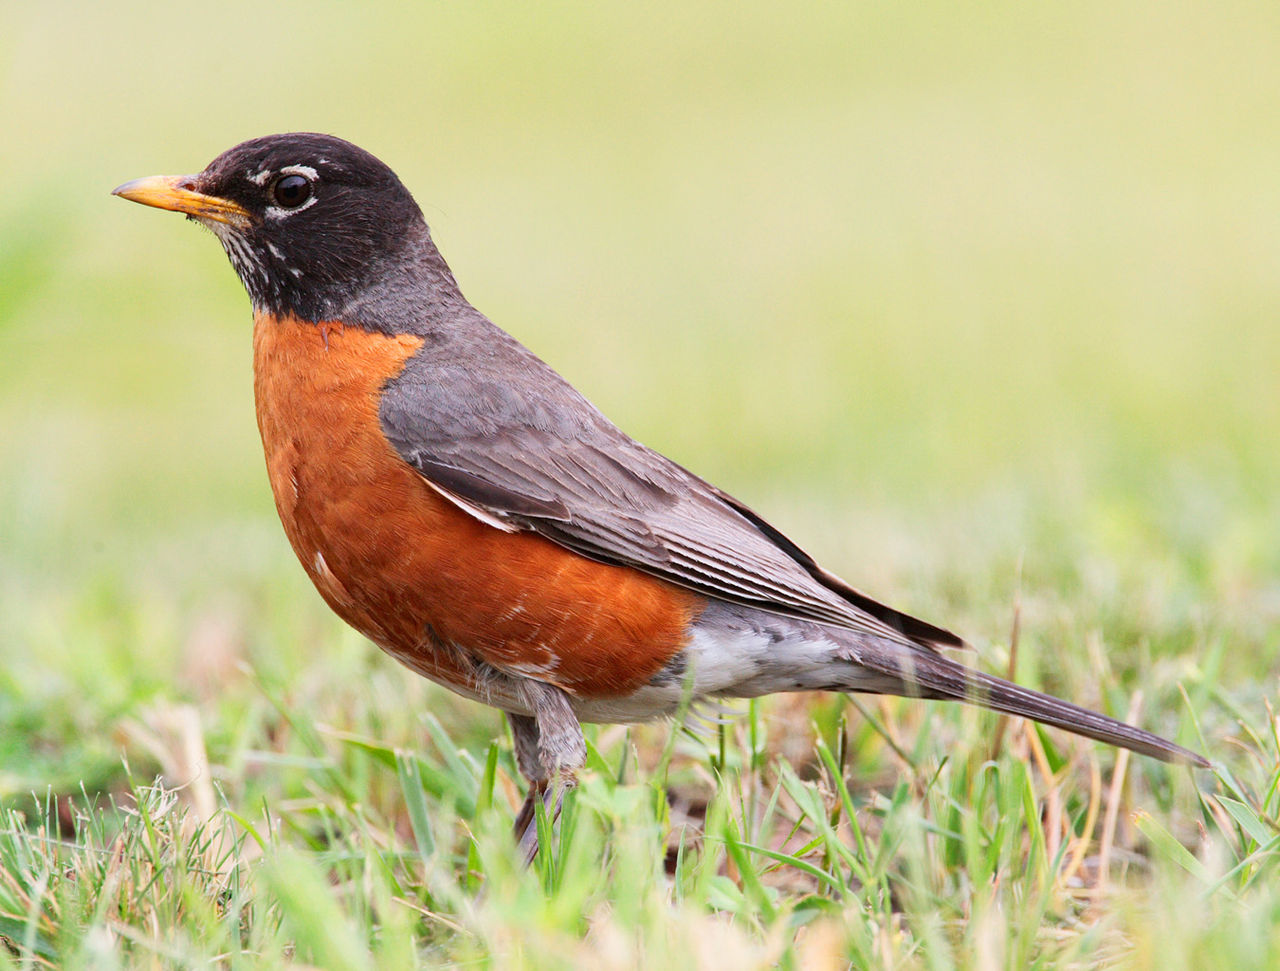

In [ ]:
img

In [ ]:
img_transofrmed = transform(img)

In [ ]:
img_transofrmed

tensor([[[ 1.7009,  1.6838,  1.7009,  ...,  1.6495,  1.6495,  1.6495],
         [ 1.6838,  1.6667,  1.6838,  ...,  1.6667,  1.6667,  1.6667],
         [ 1.6838,  1.6838,  1.7180,  ...,  1.6667,  1.6667,  1.6667],
         ...,
         [ 1.1529,  0.5536,  0.5022,  ...,  1.6667,  1.8893,  1.7694],
         [ 1.3927,  0.6906,  0.2111,  ...,  1.6495,  1.8037,  1.6324],
         [ 1.4954,  1.5125,  1.0673,  ...,  1.5297,  1.7523,  1.6153]],

        [[ 1.8158,  1.7983,  1.8158,  ...,  1.7808,  1.7808,  1.7808],
         [ 1.7983,  1.7983,  1.8158,  ...,  1.7983,  1.7983,  1.7983],
         [ 1.7983,  1.7808,  1.8158,  ...,  1.7983,  1.7983,  1.7983],
         ...,
         [ 1.1681,  0.6429,  0.7829,  ...,  1.5532,  1.5532,  1.5532],
         [ 1.3081,  0.2052,  0.3627,  ...,  1.5182,  1.4657,  1.4132],
         [ 1.4657,  1.0280,  0.8880,  ...,  1.4482,  1.4832,  1.4307]],

        [[ 1.2631,  1.2457,  1.2457,  ...,  0.9668,  0.9668,  0.9668],
         [ 1.1934,  1.1934,  1.2108,  ...,  0

In [ ]:
img_transofrmed.shape

torch.Size([3, 224, 224])

In [ ]:
fake_batch = torch.unsqueeze(img_transofrmed, 0)

In [ ]:
out = resnet_pretrianed(fake_batch)
print(out.shape)

torch.Size([1, 1000])


In [ ]:
out

tensor([[-7.8428e-01, -1.5234e-01, -5.1853e-01, -8.5797e-01, -6.7166e-01,
          6.0502e-04, -6.0001e-01,  7.0259e-01,  5.5301e-01, -6.8469e-01,
         -3.4478e-01, -4.1258e-01, -1.4396e-01, -3.9722e-01, -8.1625e-01,
          2.3941e-01, -2.3108e-01,  1.2513e-01,  2.7680e-01, -1.2548e-01,
         -5.1874e-01, -4.4445e-01, -8.6723e-01,  3.3718e-01, -6.8357e-01,
         -8.1092e-01, -6.3050e-01, -5.2377e-01, -4.5531e-01, -3.0463e-01,
         -5.6473e-01, -6.1266e-01, -4.6898e-01, -5.9665e-01, -1.9657e-01,
         -5.7666e-01,  6.3736e-01, -4.2730e-01, -1.2305e-01,  1.0504e-01,
         -3.3758e-01, -1.4080e-01, -5.5108e-01, -1.4520e-01, -1.9727e-01,
         -2.4121e-01, -4.0449e-01, -5.0544e-01, -9.5382e-01, -6.2576e-01,
         -3.4846e-01,  4.4638e-01, -1.4706e-01, -1.5056e-01, -3.2230e-01,
         -8.6211e-01, -5.4903e-01, -1.0328e+00, -3.9117e-01,  2.4229e-01,
          8.5770e-01, -1.9956e-01, -1.2796e-01, -1.4206e-01, -5.6164e-01,
         -1.2812e-01, -3.0797e-01, -3.

In [ ]:
!wget https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt .

--2023-12-11 23:48:06--  https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21674 (21K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  21.17K  --.-KB/s    in 0s      

2023-12-11 23:48:06 (139 MB/s) - ‘imagenet_classes.txt’ saved [21674/21674]

--2023-12-11 23:48:06--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2023-12-11 23:48:06--
Total wall clock time: 0.09s
Downloaded: 1 files, 21K in 0s (139 MB/s)


In [ ]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [ ]:
_, index = torch.max(out, 1)
index

tensor([463])

In [ ]:
top_indices = sorted( list(zip(range(len(out[0])), [float(x) for x in out[0]])), key = lambda x: x[1])[::-1][:10]
top_indices

[(463, 1.8433547019958496),
 (600, 1.8236067295074463),
 (733, 1.758657455444336),
 (618, 1.7501546144485474),
 (731, 1.7184412479400635),
 (515, 1.678594946861267),
 (852, 1.6666069030761719),
 (523, 1.646491527557373),
 (836, 1.6154804229736328),
 (898, 1.6067363023757935)]

In [ ]:
[(labels[i], percentage[i]) for i, exp_percent in top_indices]

[('bucket, pail', tensor(0.5032, grad_fn=<SelectBackward0>)),
 ('hook, claw', tensor(0.4933, grad_fn=<SelectBackward0>)),
 ('pole', tensor(0.4623, grad_fn=<SelectBackward0>)),
 ('ladle', tensor(0.4584, grad_fn=<SelectBackward0>)),
 ("plunger, plumber's helper", tensor(0.4441, grad_fn=<SelectBackward0>)),
 ('cowboy hat, ten-gallon hat', tensor(0.4268, grad_fn=<SelectBackward0>)),
 ('tennis ball', tensor(0.4217, grad_fn=<SelectBackward0>)),
 ('crutch', tensor(0.4133, grad_fn=<SelectBackward0>)),
 ('sunglass', tensor(0.4006, grad_fn=<SelectBackward0>)),
 ('water bottle', tensor(0.3972, grad_fn=<SelectBackward0>))]

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [ ]:
print(labels[index[0]], percentage[index[0]].item())

bucket, pail 0.5031854510307312


## Downloading pretrained models

https://github.com/NVIDIA/pix2pixHD

In [ ]:
!git clone https://github.com/NVIDIA/pix2pixHD.git

In [ ]:
%cd pix2pixHD/

/home/maxmmsu/harbour.space.course/pix2pixHD


In [ ]:
from models.pix2pixHD_model import Pix2PixHDModel

In [ ]:
our_pix2pixHD_model = Pix2PixHDModel()

In [ ]:
our_pix2pixHD_model.

OrderedDict()